In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="darkgrid")
%matplotlib inline

In [19]:
jobs_data = pd.read_csv('../Scraped_Data/Canada_jobs_per_city_August_5.csv', encoding='UTF-8')

In [20]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State
0,27950,990,Toronto,Ontario
1,28312,978,Montreal,Quebec
2,16773,1062,Vancouver,British Columbia
3,7210,1024,Calgary,Alberta
4,7133,1018,Edmonton,Alberta


In [21]:
jobs_data.describe()

,Expected_jobs,Actual_jobs
count,100.000000,100.000000
mean,2741.670000,613.120000
std,5026.372433,331.921564
min,119.000000,4.000000
25%,476.500000,351.000000
50%,952.500000,607.000000
75%,2221.500000,979.250000
max,28312.000000,1062.000000


In [23]:
jobs_data.dtypes

Expected_jobs     int64
Actual_jobs       int64
City             object
State            object
dtype: object

## Analysing First digits of Expected Jobs vs Actual Jobs

In [6]:
jobs_data['Expected_jobs_first'] = jobs_data['Expected_jobs'].astype(str).str[0]
jobs_data['Actual_jobs_first'] = jobs_data['Actual_jobs'].astype(str).str[0]

In [7]:
jobs_data.dtypes

Expected_jobs           int64
Actual_jobs             int64
City                   object
State                  object
Expected_jobs_first    object
Actual_jobs_first      object
dtype: object

In [8]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
0,47041,1424,New York,New York,4,1
1,87813,1443,Los Angeles,California,8,1
2,53490,1419,Chicago,Illinois,5,1
3,46346,1356,Houston,Texas,4,1
4,45872,1435,Phoenix,Arizona,4,1


In [35]:
jobs_data.describe(include="all")

,Expected_jobs,Actual_jobs,City,State,diff,diff_first
count,100.000000,100.000000,100,100,100.000000,100
unique,NaN,NaN,100,10,NaN,9
top,NaN,NaN,Midland,Ontario,NaN,1
freq,NaN,NaN,1,39,NaN,26
mean,2741.670000,613.120000,NaN,NaN,2128.550000,NaN
std,5026.372433,331.921564,NaN,NaN,4932.891013,NaN
min,119.000000,4.000000,NaN,NaN,3.000000,NaN
25%,476.500000,351.000000,NaN,NaN,47.500000,NaN
50%,952.500000,607.000000,NaN,NaN,149.500000,NaN
75%,2221.500000,979.250000,NaN,NaN,1713.000000,NaN


### Seprating first digit data

In [10]:
first_digit_data = jobs_data[['Expected_jobs_first','Actual_jobs_first']]

In [11]:
first_digit_data.head()

,Expected_jobs_first,Actual_jobs_first
0,4,1
1,8,1
2,5,1
3,4,1
4,4,1


In [12]:
Expected_first = first_digit_data.Expected_jobs_first.value_counts()
print(Expected_first[Expected_first>1])

3    66
1    64
2    62
4    41
6    22
5    20
7    18
8    18
9     5
Name: Expected_jobs_first, dtype: int64


In [24]:
Actual_first = first_digit_data.Actual_jobs_first.value_counts()
print(Expected_first[Actual_first>1])

3    66
1    64
2    62
4    41
6    22
5    20
7    18
8    18
9     5
Name: Expected_jobs_first, dtype: int64


### Expected Jobs

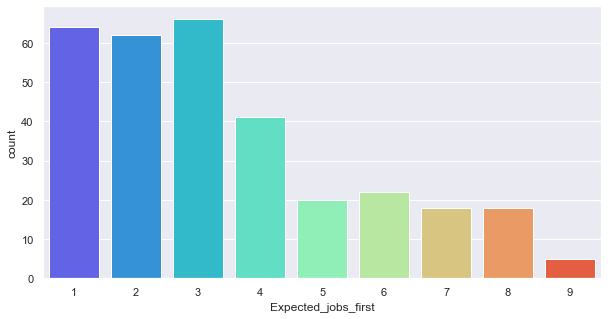

In [14]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x='Expected_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

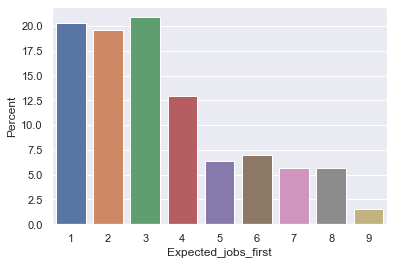

In [25]:
ax = sns.barplot(x="Expected_jobs_first", y="Expected_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Expected_jobs_first: len(Expected_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Actual jobs

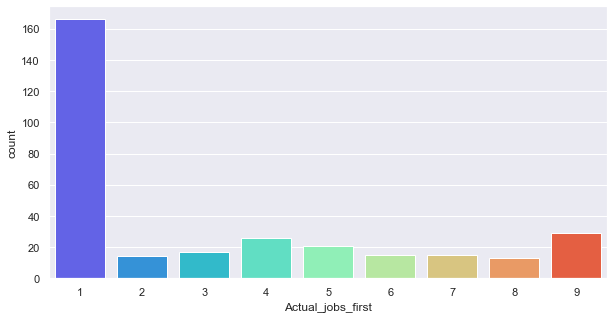

In [16]:
sns.countplot(x='Actual_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

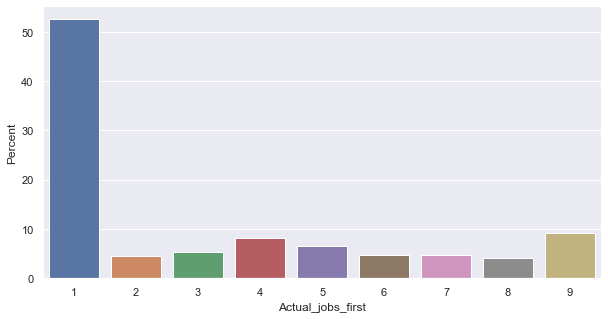

In [17]:
ax = sns.barplot(x="Actual_jobs_first", y="Actual_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Actual_jobs_first: len(Actual_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Difference in Expected vs Actual jobs

In [29]:
jobs_data['diff'] = jobs_data['Expected_jobs'] - jobs_data['Actual_jobs']

In [31]:
jobs_data['diff_first'] = jobs_data['diff'].astype(str).str[0]

In [33]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,diff,diff_first
0,27950,990,Toronto,Ontario,26960,2
1,28312,978,Montreal,Quebec,27334,2
2,16773,1062,Vancouver,British Columbia,15711,1
3,7210,1024,Calgary,Alberta,6186,6
4,7133,1018,Edmonton,Alberta,6115,6


[Text(0, 0.5, 'Percent')]

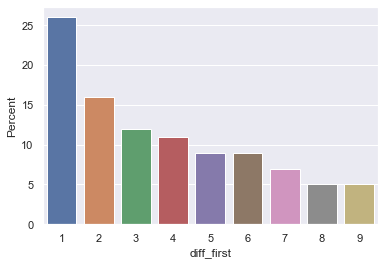

In [34]:
ax = sns.barplot(x="diff_first", y="diff_first", 
                 data=jobs_data, 
                 estimator=lambda diff_first: len(diff_first) / len(jobs_data) * 100)
ax.set(ylabel="Percent")